# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("F:/Neeyati/VIP_Internship/Telecom Data - Machine Learning/Telecom Data.csv")
pred_df=pd.read_csv("F:/Neeyati/VIP_Internship/Telecom Data - Machine Learning/Telecom - Prediction Data.csv")

In [3]:
#To explore and understand the data (Dimension)
cust_df.shape
pred_df.shape

(51047, 58)

(20000, 58)

In [4]:
cust_df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [5]:
len(cust_df.columns),len(pred_df.columns)

(58, 58)

In [6]:
#Representaion of the dataset
cust_df.head()
pred_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [7]:
#To check duplication is present in data or not
cust_df.CustomerID.nunique()/cust_df.shape[0] 
pred_df.CustomerID.nunique()/pred_df.shape[0]
#shape:To check dimension of the data, if data contain m rows and n cols then shape will be (m,n) 
#shape[i] ,i =0,1 
#0 for rows and 1 for cols

1.0

1.0

In [8]:
cust_df.Churn.value_counts()
#value_counts() function returns object containing counts of unique values.
#The resulting object will be in descending order &  Excludes NA values by default.

No     36336
Yes    14711
Name: Churn, dtype: int64

In [9]:
#Percentage count for Churn Customer.
100*cust_df.Churn.value_counts()/cust_df.shape[0]

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

#### From above count we can say that ,our data set is imbalanced.We will work on this in further stpes.

## Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

In [10]:
#To check How many customers had zero monthly revenue. As they are not contributing any revenue to the company we can exclude them here.
cust_df[cust_df.MonthlyRevenue == 0].shape
cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]
cust_df.shape
cust_df = cust_df[cust_df["MonthlyMinutes"]>0.0]
cust_df.shape

(6, 58)

(50882, 58)

(50162, 58)

In [11]:
#Calculate for each column % of missing value in the data and if the missing data is less than 5 % we can exclude them row-wise.
100*(cust_df.isnull().sum()/cust_df.shape[0])
#To remove data
cust_df.dropna(axis=0,inplace=True)
cust_df.shape[0]


CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

49078

#### As no column contain misiing data more than 5% we can remove missing rows of our data.

<AxesSubplot:>

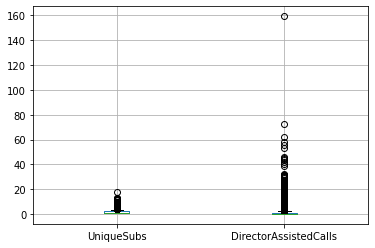

In [12]:
#Box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [13]:
#wRemove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q_value=[i/100 for i in range(95,101,1)] #range(6) means 0 to 5 
cust_df[cols].quantile(q_value)


,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


<AxesSubplot:>

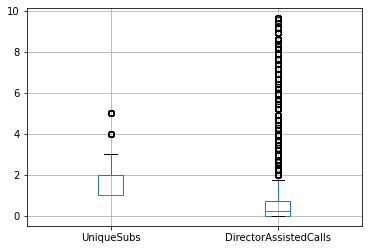

In [14]:
# From Above 1 % values are 5 AND 9.65
cust_df= cust_df[(cust_df.UniqueSubs <= 5) & (cust_df.DirectorAssistedCalls <= 9.65)]
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

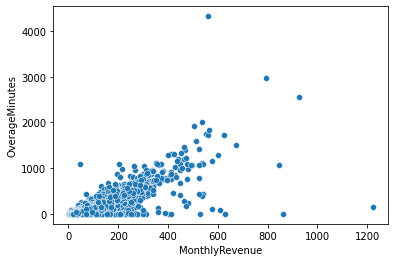

In [15]:
#To check customer with high overage minutes also have high revenue.
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df )

##### From above scatter plot we can see that there is positive correlation between Overage Minutes and Monthly revenue i.e as Overage minutes increase Monthly Revneue will may increase.


### Q2.2 Does high number of active subscribers lead to low monthly revenue?

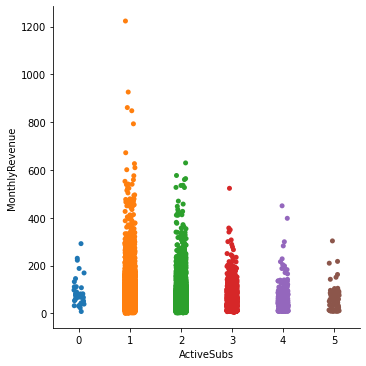

In [16]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x= "ActiveSubs",y="MonthlyRevenue", data = cust_df) 

#### Result:
As active Subscribers increases Monthly Revenue Decreases.

In [17]:
#To check credit rating impact on churt rate.
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0)
pd.crosstab(cust_df.Churn,cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.69872,0.703981,0.697558,0.745779,0.786099,0.739027,0.718026
Yes,0.30128,0.296019,0.302442,0.254221,0.213901,0.260973,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161832,0.370971,0.160279,0.109317,0.138640,0.017927,0.041034
Yes,0.177695,0.397230,0.176962,0.094893,0.096065,0.016121,0.041035


#### Result:
    
No deifinite trend is obsereved in churn due to Credit Card Score.

### Placeholder for additional exploratory analysis

## Q3. Create additional features to help predict churn

In [18]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    cust_df['perc_Overage_min'] = cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    cust_df['perc_RoamingCalls_min'] = cust_df['RoamingCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_DroppedCalls_min'] = cust_df['DroppedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_BlockedCalls_min'] = cust_df['BlockedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_UnansweredCalls_min'] = cust_df['UnansweredCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_CustomerCareCalls_min'] = cust_df['CustomerCareCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_ThreewayCalls_min'] = cust_df['ThreewayCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_ReceivedCalls_min'] = cust_df['ReceivedCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_OutboundsCalls_min'] = cust_df['OutboundCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_InboundsCalls_min'] = cust_df['InboundCalls']/cust_df['MonthlyMinutes']
    cust_df['perc_PeackCalls_InOut'] = cust_df['PeakCallsInOut']/cust_df['MonthlyMinutes']
    cust_df['perc_Off_PeakCalls_InOut'] = cust_df['OffPeakCallsInOut']/cust_df['MonthlyMinutes']
    return cust_df  


In [19]:
#call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df.head()
pred_df=create_features(pred_df)
pred_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_DroppedCalls_min,perc_BlockedCalls_min,perc_UnansweredCalls_min,perc_CustomerCareCalls_min,perc_ThreewayCalls_min,perc_ReceivedCalls_min,perc_OutboundsCalls_min,perc_InboundsCalls_min,perc_PeackCalls_InOut,perc_Off_PeakCalls_InOut
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0.003196,0.003196,0.028767,0.000000,0.000000,0.443836,0.000000,0.000000,0.264840,0.109589
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0.030000,0.000000,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.100000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.037500,0.000000,0.162500,0.462500
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0.039634,0.005869,0.057927,0.003277,0.000991,0.152668,0.282241,0.112043,0.423552,0.231479
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0.013196,0.002493,0.019062,0.001026,0.000000,0.061877,0.009824,0.000000,0.048827,0.077713


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,perc_DroppedCalls_min,perc_BlockedCalls_min,perc_UnansweredCalls_min,perc_CustomerCareCalls_min,perc_ThreewayCalls_min,perc_ReceivedCalls_min,perc_OutboundsCalls_min,perc_InboundsCalls_min,perc_PeackCalls_InOut,perc_Off_PeakCalls_InOut
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0.017184,0.002070,0.126915,0.003520,0.000621,0.114493,0.095859,0.013043,0.173292,0.325052
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0.017018,0.001228,0.135088,0.015263,0.000000,0.186491,0.025789,0.001228,0.170702,0.158421
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0.012223,0.002887,0.169394,0.010876,0.000289,0.205871,0.099423,0.000289,0.229355,0.185082
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0.013072,0.004575,0.113072,0.000000,0.000000,0.216340,0.052288,0.030719,0.315686,0.045752
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0.002226,0.004946,0.036026,0.003545,0.000000,0.404040,0.041797,0.006843,0.156059,0.086562


In [20]:
#To classify between categorical and continuous variable.
def check_cat (cust_df):
    colnames=cust_df.columns
    categorical_cols=[]
    cotinuous_cols=[]
    
    for i in colnames:
        
        if cust_df[i].nunique() < 20:
            if i !="Churn":
                categorical_cols.append(i)
        else:
            if i not in ["CustomerID","ServiceArea"]:
                 cotinuous_cols.append(i)
    return( categorical_cols, cotinuous_cols)



In [21]:
categorical_cols , continuous_cols = check_cat(cust_df)


In [22]:
categorical_cols

['UniqueSubs',
 'ActiveSubs',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus',
 'perc_active_subs']

In [23]:
continuous_cols

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'Handsets',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'perc_recurrent_charge',
 'perc_Overage_min',
 'perc_RoamingCalls_min',
 'perc_DroppedCalls_min',
 'perc_BlockedCalls_min',
 'perc_UnansweredCalls_min',
 'perc_CustomerCareCalls_min',
 'perc_ThreewayCalls_min',
 'perc_ReceivedCalls_min',
 'perc_OutboundsCalls_min',
 'perc_InboundsCalls_min',
 'perc_PeackCalls_InOut',
 'perc_Off_PeakCalls_InOut']

In [24]:
#Filter out the categorical variable that have impact on Churn rate using chi square  independece test with 
#NULL Hypothesis: Varibles are independent.
def check_categorical_imp(cust_df, categorical_cols):
    new_cat_cols=[]
    for i in categorical_cols:
        if stats.chi2_contingency(pd.crosstab(cust_df.Churn,cust_df[i]))[1]>0.05:
            pass
        else:
            new_cat_cols.append(i)
    return new_cat_cols

In [25]:
imp_categorical_cols= check_categorical_imp(cust_df,categorical_cols)

In [26]:
len(categorical_cols)
len(imp_categorical_cols)

30

18

#### From 30 variables 18 varibles have impact on Churn rate from chi square test.

In [27]:
cust_df.shape

(48399, 72)

In [28]:
cust_df.Churn.value_counts()

No     34752
Yes    13647
Name: Churn, dtype: int64

In [29]:
#Balancing Data Set by oversampling.
cust_df["Churn"]= cust_df["Churn"].replace(["Yes","No"],[1,0])
class_count_0,class_count_1 = cust_df["Churn"].value_counts()

class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]

class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over,class_0],axis=0)

cust_df = test_over
y = cust_df.Churn
y.value_counts()/len(y)*100

0    50.0
1    50.0
Name: Churn, dtype: float64

In [30]:
 cust_df["Churn"].value_counts()


0    34752
1    34752
Name: Churn, dtype: int64

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [31]:
cols_to_be_drop=[]
for col in categorical_cols:
    if col not in imp_categorical_cols:
            cols_to_be_drop.append(col)


In [32]:
cust_df["Churn"]=cust_df["Churn"].replace(["Yes","No"],[1,0])

In [33]:
cust_df.shape


(69504, 72)

In [34]:
#Storingchurn flag variable in y
y = cust_df.Churn
customerid= cust_df.CustomerID
monthlyrevenue = cust_df.MonthlyRevenue
#Drop Un-important cols
pred_df.drop(["CustomerID","ServiceArea","Churn"],axis=1)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,perc_DroppedCalls_min,perc_BlockedCalls_min,perc_UnansweredCalls_min,perc_CustomerCareCalls_min,perc_ThreewayCalls_min,perc_ReceivedCalls_min,perc_OutboundsCalls_min,perc_InboundsCalls_min,perc_PeackCalls_InOut,perc_Off_PeakCalls_InOut
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,0.017184,0.002070,0.126915,0.003520,0.000621,0.114493,0.095859,0.013043,0.173292,0.325052
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,0.017018,0.001228,0.135088,0.015263,0.000000,0.186491,0.025789,0.001228,0.170702,0.158421
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,0.012223,0.002887,0.169394,0.010876,0.000289,0.205871,0.099423,0.000289,0.229355,0.185082
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,0.013072,0.004575,0.113072,0.000000,0.000000,0.216340,0.052288,0.030719,0.315686,0.045752
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,0.002226,0.004946,0.036026,0.003545,0.000000,0.404040,0.041797,0.006843,0.156059,0.086562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,...,0.014724,0.000000,0.018773,0.000000,0.001595,0.173006,0.011043,0.004049,0.088344,0.047485
19996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cust_df=cust_df[imp_categorical_cols+continuous_cols]
pred_df=pred_df[imp_categorical_cols+continuous_cols]
cust_df.shape
pred_df.shape
cust_df.head()
pred_df.head()

(69504, 57)

(20000, 57)

,UniqueSubs,ActiveSubs,HandsetModels,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,RetentionCalls,...,perc_DroppedCalls_min,perc_BlockedCalls_min,perc_UnansweredCalls_min,perc_CustomerCareCalls_min,perc_ThreewayCalls_min,perc_ReceivedCalls_min,perc_OutboundsCalls_min,perc_InboundsCalls_min,perc_PeackCalls_InOut,perc_Off_PeakCalls_InOut
1293,1,1,2.0,Yes,Yes,Known,Yes,Yes,Yes,0,...,0.006643,0.021005,0.057451,0.000000,0.000000,0.141652,0.032316,0.000539,0.199820,0.168223
647,1,1,1.0,No,No,Known,Yes,Yes,Yes,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3237,1,1,3.0,No,Yes,Known,Yes,Yes,Yes,0,...,0.012658,0.000000,0.024051,0.000000,0.002954,0.146414,0.126582,0.015612,0.180169,0.205485
1159,2,1,3.0,No,Yes,Unknown,No,No,No,0,...,0.009091,0.003953,0.046245,0.000000,0.000000,0.039921,0.026482,0.007905,0.139526,0.056522
8870,1,1,1.0,No,No,Unknown,No,No,No,0,...,0.004228,0.006342,0.034461,0.002114,0.000000,0.257928,0.057082,0.026850,0.154968,0.089429


,UniqueSubs,ActiveSubs,HandsetModels,HandsetRefurbished,HandsetWebCapable,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,RetentionCalls,...,perc_DroppedCalls_min,perc_BlockedCalls_min,perc_UnansweredCalls_min,perc_CustomerCareCalls_min,perc_ThreewayCalls_min,perc_ReceivedCalls_min,perc_OutboundsCalls_min,perc_InboundsCalls_min,perc_PeackCalls_InOut,perc_Off_PeakCalls_InOut
0,1,1,6,No,Yes,Unknown,Yes,Yes,Yes,0,...,0.017184,0.002070,0.126915,0.003520,0.000621,0.114493,0.095859,0.013043,0.173292,0.325052
1,1,1,4,No,Yes,Known,No,No,Yes,0,...,0.017018,0.001228,0.135088,0.015263,0.000000,0.186491,0.025789,0.001228,0.170702,0.158421
2,1,1,3,No,No,Unknown,No,No,No,0,...,0.012223,0.002887,0.169394,0.010876,0.000289,0.205871,0.099423,0.000289,0.229355,0.185082
3,3,2,5,No,Yes,Known,Yes,Yes,Yes,0,...,0.013072,0.004575,0.113072,0.000000,0.000000,0.216340,0.052288,0.030719,0.315686,0.045752
4,1,1,4,No,Yes,Known,Yes,Yes,Yes,0,...,0.002226,0.004946,0.036026,0.003545,0.000000,0.404040,0.041797,0.006843,0.156059,0.086562


#### Scale Continuous variable

In [36]:
#To Train-Tests split
from sklearn.model_selection import train_test_split
#Feature Scaling for cotinuous random variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [37]:
cust_df[continuous_cols]= sc.fit_transform(cust_df[continuous_cols])

In [38]:
pred_df=pred_df.replace([np.inf,-np.inf],np.nan).dropna(axis=0)
pred_df.shape

(19256, 57)

In [39]:
pred_df[continuous_cols]= sc.fit_transform(pred_df[continuous_cols])

In [40]:
complete_Data=pd.concat(objs=[cust_df,pred_df],axis=0)
complete_Data.shape

(88760, 57)

In [41]:
#To Create dummy variables for all categorical variables.
Data=pd.get_dummies(complete_Data)
cust_df=Data[:len(cust_df)]
pred_df=Data[len(cust_df):]

In [42]:
cust_df.head()
cust_df.shape
pred_df.head()
pred_df.shape

,UniqueSubs,ActiveSubs,HandsetModels,RetentionCalls,RetentionOffersAccepted,IncomeGroup,perc_active_subs,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,...,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
1293,1,1,2.0,0,0,9,1.0,-0.397636,0.088062,0.603589,...,0,0,0,1,0,0,0,0,0,1
647,1,1,1.0,0,0,5,1.0,-0.663301,-0.786508,-0.709715,...,0,0,0,0,0,1,0,1,0,0
3237,1,1,3.0,0,0,9,1.0,-0.049157,-0.546547,-0.709715,...,0,0,0,0,0,1,0,0,0,1
1159,2,1,3.0,0,0,6,0.5,-0.549815,-0.514817,-0.053063,...,0,0,0,0,0,1,0,1,0,0
8870,1,1,1.0,0,0,0,1.0,-0.503336,-0.078523,-0.053063,...,0,0,0,0,0,0,1,0,1,0


(69504, 90)

,UniqueSubs,ActiveSubs,HandsetModels,RetentionCalls,RetentionOffersAccepted,IncomeGroup,perc_active_subs,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,...,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,1,1,6.0,0,0,5,1.000000,-0.040680,-0.093713,-0.428776,...,1,0,0,1,0,0,0,1,0,0
1,1,1,4.0,0,0,6,1.000000,-0.092707,0.070703,1.033751,...,0,0,0,1,0,0,0,1,0,0
2,1,1,3.0,0,0,4,1.000000,0.876705,0.957036,0.114448,...,0,0,0,0,0,1,0,0,0,1
3,3,2,5.0,0,0,4,0.666667,-0.544838,-0.717358,-0.721281,...,0,0,0,1,0,0,0,1,0,0
4,1,1,4.0,0,0,3,1.000000,-0.091786,1.285867,0.114448,...,0,0,0,0,0,1,0,1,0,0


(19256, 90)

In [43]:
#Defining columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)
X= cust_df
Y=y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48652, 90), (20852, 90), (48652,), (20852,))

In [45]:
y_train.value_counts()

1    24509
0    24143
Name: Churn, dtype: int64

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,f1_score

In [47]:
#-------------------------------- Model training -------------------------------#
LGR=LogisticRegression(random_state=0)
#To build logistic regression model on training data set.
logistic_classifier=LGR.fit(X_train,y_train)
logistic_pred_train_out=logistic_classifier.predict_proba(X_train)[:,1]
logistic_pred_train_out[1:10]

array([0.46109976, 0.3430607 , 0.71039525, 0.35933132, 0.60901316,
       0.34740595, 0.33974167, 0.52900628, 0.56047737])

In [48]:
#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted model
logistic_pred_test_out=logistic_classifier.predict_proba(X_test)[:,1]
logistic_pred_test_out[1:10]

array([0.46995765, 0.44726245, 0.59552783, 0.57575893, 0.29318728,
       0.5017033 , 0.41382145, 0.61692115, 0.44947231])

In [49]:
import copy
def efficient_cutoff (actual_value,predicted):
    prob_cutoff= []
    f1_score_val=[]
    for i in range(0,101):
        predicted_x= copy.deepcopy(predicted)
        predicted_x[predicted_x  >= i/100]=1
        predicted_x[predicted_x  <  i/100]=0
        prob_cutoff.append(i/100)
        f1_score_val.append(f1_score(actual_value,predicted_x))
    return(prob_cutoff,f1_score_val)

In [50]:
prob_cutoff_train ,f1_score_val_train = efficient_cutoff(y_train, logistic_pred_train_out)

Text(0.5, 0, 'Probability cutoff value - train-set')

Text(0, 0.5, 'f1 score train')

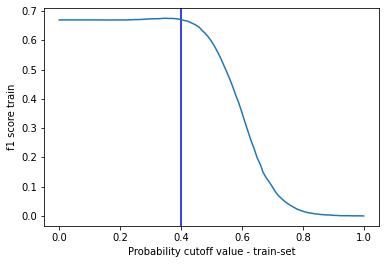

In [51]:
plt.xlabel("Probability cutoff value - train-set")
plt.axvline(x=0.4,color='b',label="avxline")
plt.ylabel("f1 score train")
plt.plot(prob_cutoff_train,f1_score_val_train)
plt.show()

In [52]:
logistic_predict_test_class=copy.deepcopy(logistic_pred_test_out)

In [53]:
logistic_predict_test_class[logistic_pred_test_out >=0.4]=1
logistic_predict_test_class[logistic_pred_test_out < 0.4]=0

In [54]:
y_test.head()

45386    0
27787    0
43983    0
22560    0
40164    0
Name: Churn, dtype: int64

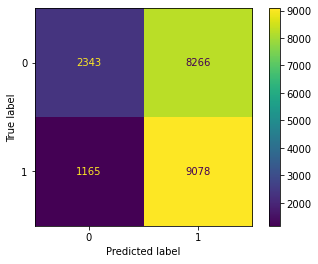

In [55]:
#Confusion Matrix
CM= confusion_matrix(y_test,logistic_predict_test_class)
Disp = ConfusionMatrixDisplay(CM)
Disp.plot()

In [56]:
print(classification_report(y_test,logistic_predict_test_class))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33     10609
           1       0.52      0.89      0.66     10243

    accuracy                           0.55     20852
   macro avg       0.60      0.55      0.50     20852
weighted avg       0.60      0.55      0.49     20852



In [57]:
test_auc_score= roc_auc_score(y_test,logistic_predict_test_class)
print("gini:{}".format(2*test_auc_score-1))
print("ROC-AUC Score{}".format(test_auc_score))
print("Accuracy{}".format(accuracy_score(y_test,logistic_predict_test_class)))

gini:0.10711401141533994
ROC-AUC Score0.55355700570767
Accuracy0.547717245348168


### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#-------------------------------- Model training -------------------------------#
clf=RandomForestClassifier(max_depth=15,min_samples_split=50,random_state=40,criterion="entropy",n_estimators=350,n_jobs=-1)
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

In [60]:
#-------------------------------- Model testing ---------------------------------#
#To predict for X_test data set using the fitted RF model
rf_train_output=clf.predict_proba(X_train)[:,1]
rf_test_output=clf.predict_proba(X_test)[:,1]
rf_train_output
rf_test_output

array([0.50465351, 0.322302  , 0.67490391, ..., 0.47517964, 0.4674368 ,
       0.19754646])

array([0.31250791, 0.37232278, 0.29481181, ..., 0.46094725, 0.51229692,
       0.49532913])

In [61]:
#Probability threshold to classify customers as churners and non churners (Default = 0.5)
rf_prob_cutoff_train, rf_f1_score_val_train = efficient_cutoff(y_train, rf_train_output)
rf_prob_cutoff_test, rf_f1_score_val_test = efficient_cutoff(y_test, rf_test_output)

Text(0.5, 0, 'Probability cutoff value - train-set')

Text(0, 0.5, 'f1 score train')

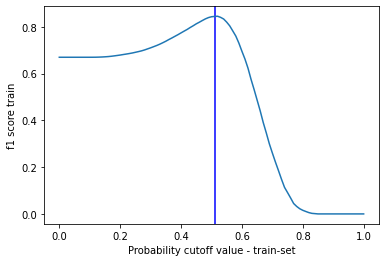

In [62]:
plt.xlabel("Probability cutoff value - train-set")
plt.axvline(x=0.51,color='b',label='avxline-full height')
plt.ylabel("f1 score train")
plt.plot(rf_prob_cutoff_train,rf_f1_score_val_train)
plt.show()

In [63]:
rf_test_class=copy.deepcopy(rf_test_output)

In [64]:
rf_test_class[rf_test_output >= 0.53]=1
rf_test_class[rf_test_output <  0.53]=0

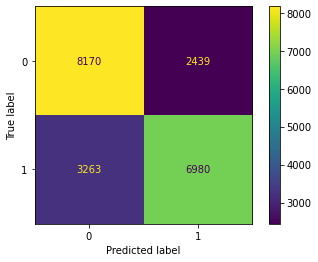

In [65]:
CM1= confusion_matrix(y_test,rf_test_class)
Disp = ConfusionMatrixDisplay(CM1)
Disp.plot()

In [66]:
print(classification_report(y_test,rf_test_class))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10609
           1       0.74      0.68      0.71     10243

    accuracy                           0.73     20852
   macro avg       0.73      0.73      0.73     20852
weighted avg       0.73      0.73      0.73     20852



<mark>__Result:__
Random Forest model works better here , we can see this from above confusion matrix where trupe positive and true negative count is greater than other two cases.

In [68]:
test_auc_score= roc_auc_score(y_test,rf_test_class)
print("gini:{}".format(2*test_auc_score-1))
print("ROC-AUC Score{}".format(test_auc_score))
print("Accuracy{}".format(accuracy_score(y_test,rf_test_class)))

gini:0.4515418418489705
ROC-AUC Score0.7257709209244853
Accuracy0.7265490120851716


### Q4.3 Identify most important features impacting churn

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature Importance plot')

<AxesSubplot:title={'center':'feature Importance plot'}>

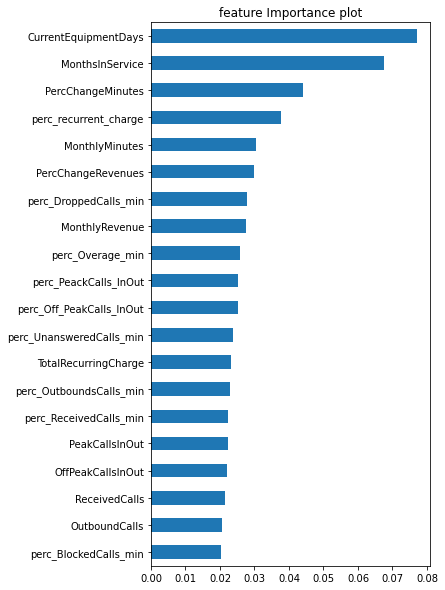

In [74]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
feat_imp=pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature Importance plot")
feat_imp.nlargest(20).sort_values(ascending=True).plot(kind='barh',)

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [86]:
pred_df.shape
pred_df.head()
Prediction=clf.predict_proba(pred_df)[:,1]
Prediction
Pred_original=copy.deepcopy(Prediction)
Pred_original[Prediction >= 0.53]=1
Pred_original[Prediction < 0.53]=0
Pred_original

(19256, 90)

,UniqueSubs,ActiveSubs,HandsetModels,RetentionCalls,RetentionOffersAccepted,IncomeGroup,perc_active_subs,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,...,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,1,1,6.0,0,0,5,1.000000,-0.040680,-0.093713,-0.428776,...,1,0,0,1,0,0,0,1,0,0
1,1,1,4.0,0,0,6,1.000000,-0.092707,0.070703,1.033751,...,0,0,0,1,0,0,0,1,0,0
2,1,1,3.0,0,0,4,1.000000,0.876705,0.957036,0.114448,...,0,0,0,0,0,1,0,0,0,1
3,3,2,5.0,0,0,4,0.666667,-0.544838,-0.717358,-0.721281,...,0,0,0,1,0,0,0,1,0,0
4,1,1,4.0,0,0,3,1.000000,-0.091786,1.285867,0.114448,...,0,0,0,0,0,1,0,1,0,0


array([0.33443669, 0.4367595 , 0.49844224, ..., 0.40996707, 0.35889351,
       0.35411026])

array([0., 0., 0., ..., 0., 0., 0.])